**AGGLOMERATIVE CLUSTERING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()

# Create a pandas DataFrame
df = pd.DataFrame(data=np.c_[iris['data']],
                  columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Display the first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


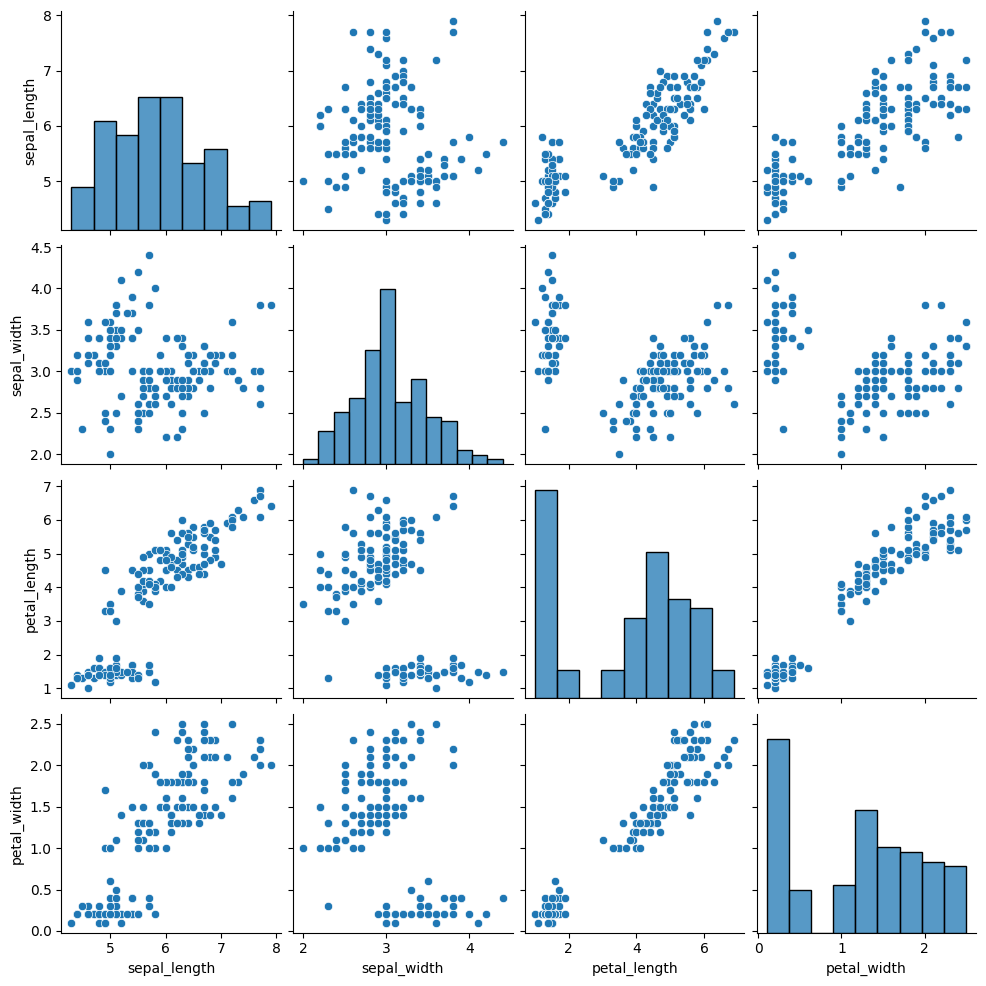

In [ ]:
sns.pairplot(df)
plt.show()

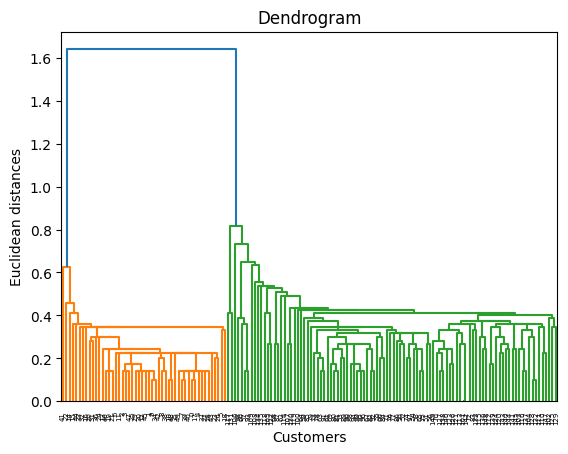

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method='single', metric= 'euclidean'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='single')
df['Predict'] = hc.fit_predict(df)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


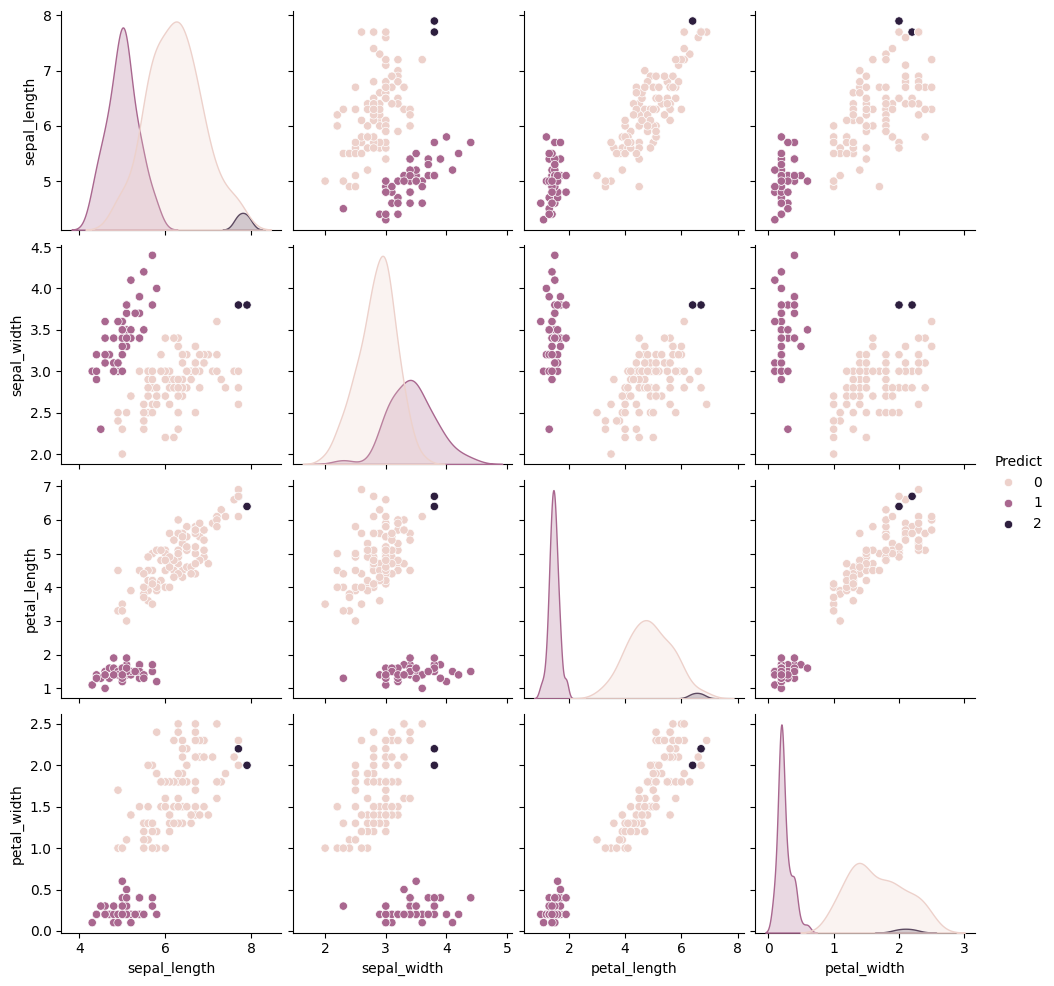

In [ ]:
sns.pairplot(df,hue='Predict')
plt.show()

In [ ]:
# prompt: check score

from sklearn.metrics import adjusted_rand_score

# Since the AgglomerativeClustering algorithm is unsupervised, it doesn't use the true labels during training.
# To evaluate its performance, we can compare the cluster assignments (`df['Predict']`) with the true labels (`iris.target`).
# The Adjusted Rand Index is a good metric for this purpose.
score = adjusted_rand_score(iris.target, df['Predict'])
print(f'Adjusted Rand Index: {score*100}')

Adjusted Rand Index: 56.37510205230709
